# Heart Disease UCI
https://www.kaggle.com/ronitf/heart-disease-uci

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting


from pandas_profiling import ProfileReport

In [20]:
report_dir = "../reports/"
figures_dir = f"{report_dir}/figures"
data_path = "../data/raw/heart.csv"

In [7]:
data = pd.read_csv(data_path)

In [8]:
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

### Attribute information
* <b>age</b>: The person's age in years
* <b>sex</b>: The person's sex (1 = male, 0 = female)
* <b>cp</b>: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* <b>trestbps</b>: The person's resting blood pressure (mm Hg on admission to the hospital)
* <b>chol</b>: The person's cholesterol measurement in mg/dl
* <b>fbs</b>: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* <b>restecg</b>: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* <b>thalach</b>: The person's maximum heart rate achieved
* <b>exang</b>: Exercise induced angina (1 = yes; 0 = no)
* <b>oldpeak</b>: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* <b>slope</b>: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* <b>ca</b>: The number of major vessels (0-3)
* <b>thal</b>: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* <b>target</b>: Heart disease (0 = no, 1 = yes)

In [16]:
profile = ProfileReport(df, title='Report', explorative=True)
profile.to_file(report_dir+"ProfileReport.html");


Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

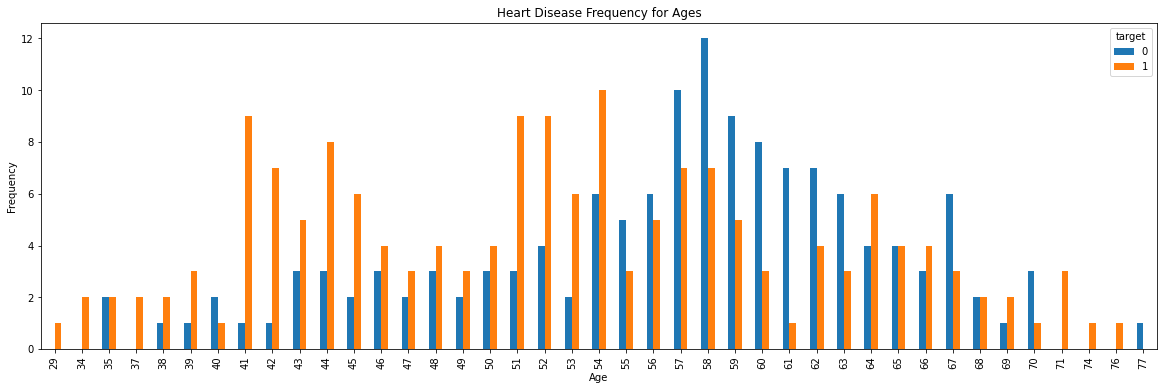

In [21]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig(f'{figures_dir}/heartDiseaseAndAges.png')
plt.show()

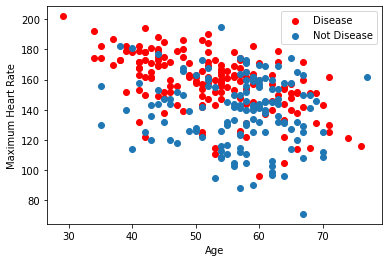

In [22]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)], c="red")
plt.scatter(x=df.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.savefig(f'{figures_dir}/heartRateAndAges.png')
plt.show()

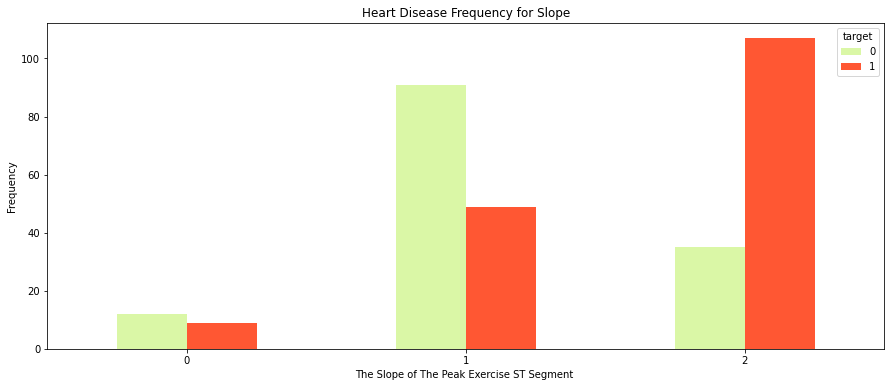

In [23]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.savefig(f'{figures_dir}/heartDeseaseAndSlope.png')
plt.show()

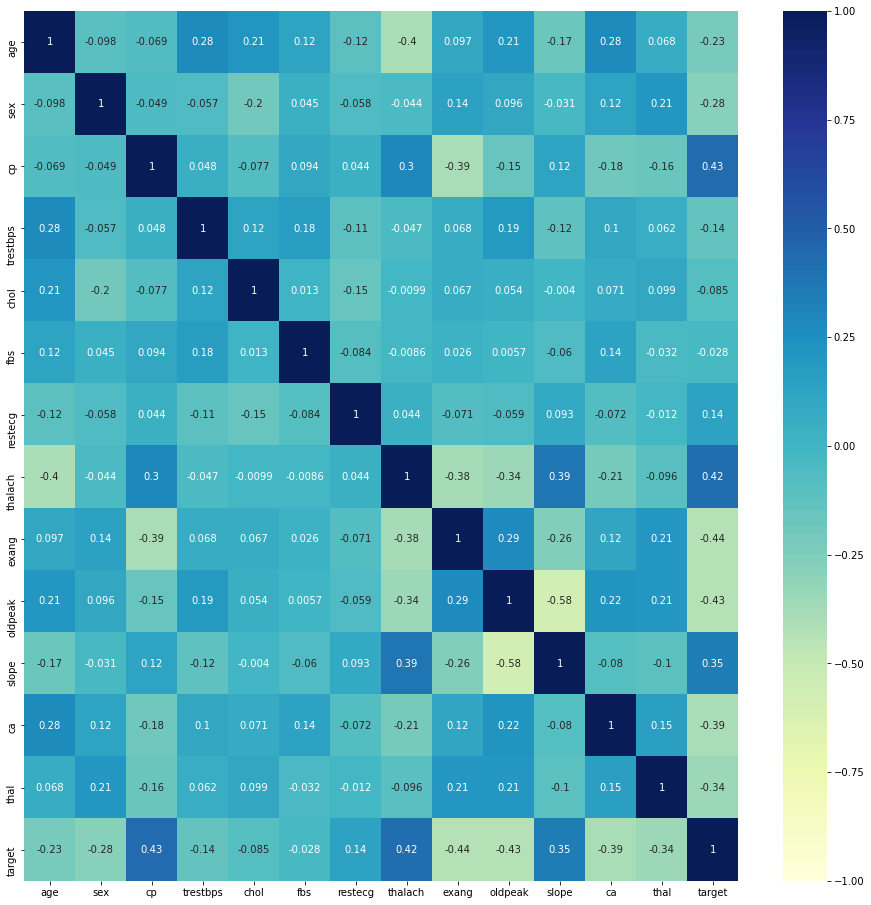

In [26]:
plt.figure(figsize=(16, 16))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
plt.savefig(f'{figures_dir}/heatmap.png')